In [40]:
# Turn of warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning)


In [41]:
import os
import numpy as np
import pandas as pd
import glob
import xarray as xr
import matplotlib.pyplot as plt
import satpy



In [42]:
from satpy.utils import check_satpy
check_satpy(readers=['seviri_l1b_hrit'],
            writers=['geotiff', 'cf', 'simple_image'],
            extras=['cartopy', 'geoviews'] )

Readers
seviri_l1b_hrit:  ok

Writers
cf:  ok
geotiff:  ok
simple_image:  ok

Extras
cartopy:  ok
geoviews:  ok



In [43]:
## Define parameters
os.environ['XRIT_DECOMPRESS_PATH'] = '/opt/conda/pkgs/public-decomp-wt-2.8.1-h3fd9d12_1/bin/xRITDecompress'

In [44]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 9


In [45]:
## Define the path to the data
channel_folders =  ['IR_087___', 'VIS008___', '_________', 'WV_073___', 'IR_016___', 'VIS006___', 'HRV______', 'IR_120___', 'IR_097___', 'IR_108___', 'IR_039___', 'IR_134___', 'WV_062___']

In [46]:
data_folder = r"/home/knn/Desktop/Test_Data/IODC/202308140600"

In [47]:
date_flag  = "202308140600"
filenames = []


In [48]:
## Search for the files in the folder

In [49]:
for f_ in channel_folders:
    for row in glob.glob1(os.path.join(data_folder, f_), f'H-000-MSG2*{date_flag}*'):
        print(row)
        filenames.append(os.path.join(data_folder, f_, row))


H-000-MSG2__-MSG2_IODC___-IR_087___-000004___-202308140600-__
H-000-MSG2__-MSG2_IODC___-IR_087___-000007___-202308140600-__
H-000-MSG2__-MSG2_IODC___-IR_087___-000008___-202308140600-__
H-000-MSG2__-MSG2_IODC___-IR_087___-000006___-202308140600-__
H-000-MSG2__-MSG2_IODC___-IR_087___-000005___-202308140600-__
H-000-MSG2__-MSG2_IODC___-IR_087___-000002___-202308140600-__
H-000-MSG2__-MSG2_IODC___-IR_087___-000001___-202308140600-__
H-000-MSG2__-MSG2_IODC___-IR_087___-000003___-202308140600-__
H-000-MSG2__-MSG2_IODC___-VIS008___-000002___-202308140600-__
H-000-MSG2__-MSG2_IODC___-VIS008___-000007___-202308140600-__
H-000-MSG2__-MSG2_IODC___-VIS008___-000006___-202308140600-__
H-000-MSG2__-MSG2_IODC___-VIS008___-000005___-202308140600-__
H-000-MSG2__-MSG2_IODC___-VIS008___-000008___-202308140600-__
H-000-MSG2__-MSG2_IODC___-VIS008___-000001___-202308140600-__
H-000-MSG2__-MSG2_IODC___-VIS008___-000004___-202308140600-__
H-000-MSG2__-MSG2_IODC___-VIS008___-000003___-202308140600-__
H-000-MS

In [50]:
## Create a scene for the data

In [51]:
scn = satpy.Scene(reader='seviri_l1b_hrit', filenames=filenames)

In [52]:
## seviri data chanells
seviri_data_names = ['HRV',
                     'IR_016',
                     'IR_039',
                     'IR_087',
                     'IR_097',
                     'IR_108',
                     'IR_120',
                     'IR_134',
                     'VIS006',
                     'VIS008',
                     'WV_062',
                     'WV_073']


In [53]:
## load the scene
scn.load(seviri_data_names)

In [54]:
scn.available_dataset_names()

['HRV',
 'IR_016',
 'IR_039',
 'IR_087',
 'IR_097',
 'IR_108',
 'IR_120',
 'IR_134',
 'VIS006',
 'VIS008',
 'WV_062',
 'WV_073']

In [55]:
scn.load(['VIS006'])

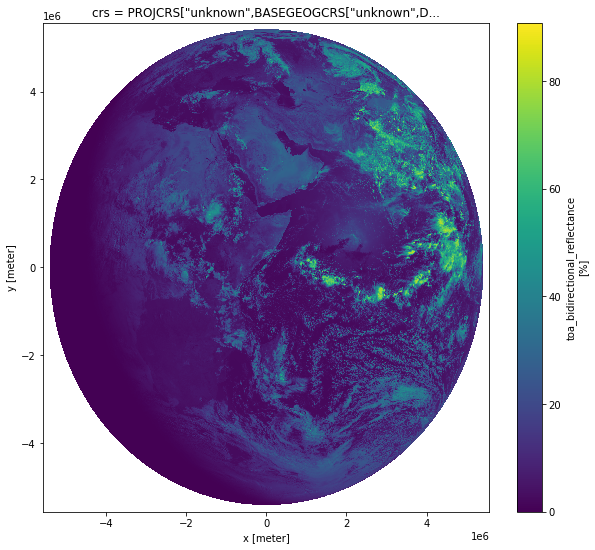

In [56]:
plt.figure()
scn['VIS006'].plot.imshow(cmap='viridis')

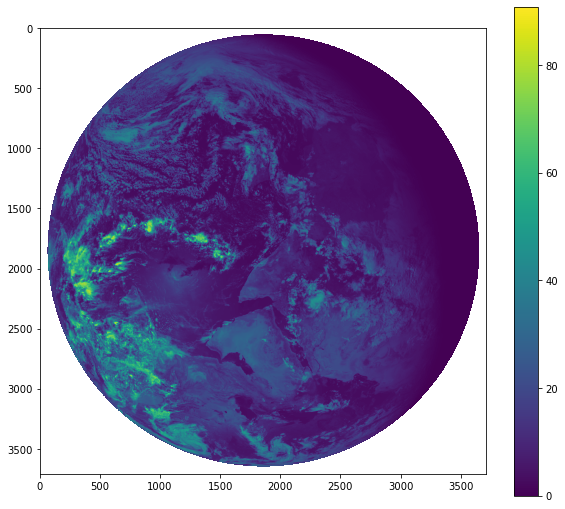

In [57]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(scn['VIS006'])
plt.colorbar()

In [58]:
scn['VIS006'].attrs['area']
plt.figure() 

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<xarray.DataArray 'concatenate-ef2e4d76e0215f42616198da4774f582' (y: 1000,
                                                                  x: 1000)>
dask.array<getitem, shape=(1000, 1000), dtype=float32, chunksize=(464, 500), chunktype=numpy.ndarray>
Coordinates:
    acq_time  (y) datetime64[ns] 2023-08-14T06:09:07.074000 ... 2023-08-14T06...
    crs       object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",...
  * y         (y) float64 2.9e+06 2.901e+06 2.902e+06 ... 3.899e+06 3.9e+06
  * x         (x) float64 3.069e+06 3.068e+06 3.067e+06 ... 2.071e+06 2.07e+06
Attributes: (12/22)
    orbital_parameters:                     {'projection_longitude': 45.5, 'p...
    time_parameters:                        {'nominal_start_time': datetime.d...
    nominal_start_time:                     (datetime.datetime(2023, 8, 14, 6...
    georef_offset_corrected:                True
    standard_name:                          toa_bidirectional_reflectance
    sun_earth_distance_correction_applied:  True
    ...                                     ...
    name:                                   HRV
    resolution:                             1000.134348869
    calibration:                            reflectance
    modifiers:                              ()
    _satpy_id:                              DataID(name='HRV', wavelength=Wav...
    ancillary_variables:                    []

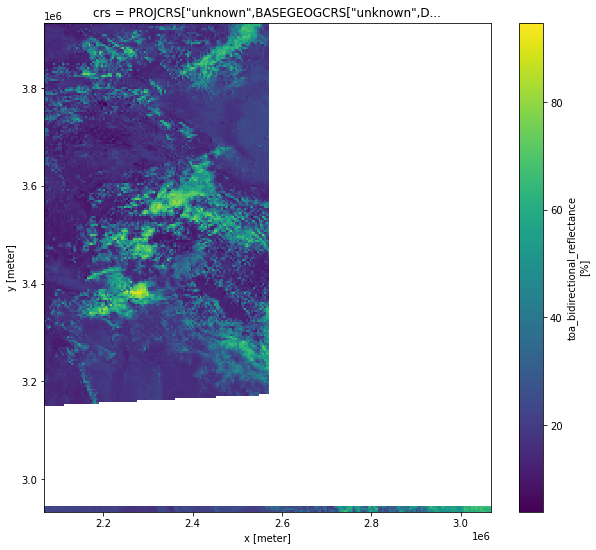

In [59]:
 # create a new figure
scn['HRV'][8500:9500:4, 2500:3500:4].plot.imshow()
scn['HRV'].sel(x=slice(3070000, 2070000), y=slice(2900000, 3900000))

In [60]:
scn['VIS006'].attrs['wavelength']  # in µm

WavelengthRange(min=0.56, central=0.635, max=0.71, unit='µm')

In [61]:
scn['VIS006'].attrs
scn[0.7].attrs['name']

'HRV'

In [62]:
nc_filename_hrv = 'seviri_test_hrv.nc'

In [63]:
lons, lats = scn['VIS006'].attrs['area'].get_lonlats()

In [64]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    scn.save_datasets(tiled=True, copy_src_overviews=True)

[########################################] | 100% Completed | 5.18 sms


In [65]:
!ls

data_distribute.ipynb	    IR_120_20230814_060000.tif
HRV_20230814_060000.png     IR_134_20230814_060000.png
HRV_20230814_060000.tif     IR_134_20230814_060000.tif
IR_016_20230814_060000.png  main.py
IR_016_20230814_060000.tif  requirements.txt
IR_039_20230814_060000.png  venv
IR_039_20230814_060000.tif  VIS006_20230814_060000.png
IR_087_20230814_060000.png  VIS006_20230814_060000.tif
IR_087_20230814_060000.tif  VIS008_20230814_060000.png
IR_097_20230814_060000.png  VIS008_20230814_060000.tif
IR_097_20230814_060000.tif  WV_062_20230814_060000.png
IR_108_20230814_060000.png  WV_062_20230814_060000.tif
IR_108_20230814_060000.tif  WV_073_20230814_060000.png
IR_120_20230814_060000.png  WV_073_20230814_060000.tif


In [66]:
with ProgressBar():
    scn.save_datasets(writer='simple_image')

[########################################] | 100% Completed | 13.26 ss


### RESAMPLE
Convert the data to the projected surface


In [67]:
new_scn = scn.resample(resampler='native')
new_scn['VIS006'] ## 11136 x 11136 
# scn['VIS006']  ## 3712 x 3712 
# plt.figure()
# plt.imshow(new_scn['VIS006'])
# plt.colorbar()

<xarray.DataArray '_repeat_by_factor-a5789b483c78f3ab7bfe89a2b447a67a' (
                                                                        y: 11136,
                                                                        x: 11136)>
dask.array<_repeat_by_factor, shape=(11136, 11136), dtype=float32, chunksize=(1392, 11136), chunktype=numpy.ndarray>
Coordinates:
    crs      object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",E...
  * y        (y) float64 -5.566e+06 -5.565e+06 -5.564e+06 ... 5.57e+06 5.571e+06
  * x        (x) float64 5.566e+06 5.565e+06 5.564e+06 ... -5.57e+06 -5.571e+06
Attributes: (12/22)
    orbital_parameters:                     {'projection_longitude': 45.5, 'p...
    time_parameters:                        {'nominal_start_time': datetime.d...
    nominal_start_time:                     (datetime.datetime(2023, 8, 14, 6...
    georef_offset_corrected:                True
    standard_name:                          toa_bidirectional_reflectance
    sun_earth_distance_correction_applied:  True
    ...                                     ...
    name:                                   VIS006
    resolution:                             3000.403165817
    calibration:                            reflectance
    modifiers:                              ()
    _satpy_id:                              DataID(name='VIS006', wavelength=...
    ancillary_variables:                    []

In [68]:
from pyresample import create_area_def
# create_area_def?


In [69]:
my_area = create_area_def('my_area', {'proj': 'longlat', 'datum': 'WGS84'},
                           area_extent=[22, 30, 45, 45],
                           resolution=0.01,
                           units='degrees',
                           description='Global 0.01x0.01 degree lat-lon grid')



In [70]:
new_scn = scn.resample(my_area)
new_scn['VIS006']


<xarray.DataArray 'my_index-651484ac21b105e8e26f96b3953e446e' (y: 1500, x: 2300)>
dask.array<my_index, shape=(1500, 2300), dtype=float32, chunksize=(1500, 2300), chunktype=numpy.ndarray>
Coordinates:
    crs      object GEOGCRS["unknown",DATUM["World Geodetic System 1984",ELLI...
  * y        (y) float64 44.99 44.98 44.97 44.96 ... 30.03 30.02 30.01 30.0
  * x        (x) float64 22.0 22.02 22.02 22.04 22.04 ... 44.97 44.97 44.98 45.0
Attributes: (12/22)
    orbital_parameters:                     {'projection_longitude': 45.5, 'p...
    time_parameters:                        {'nominal_start_time': datetime.d...
    nominal_start_time:                     (datetime.datetime(2023, 8, 14, 6...
    georef_offset_corrected:                True
    standard_name:                          toa_bidirectional_reflectance
    sun_earth_distance_correction_applied:  True
    ...                                     ...
    name:                                   VIS006
    resolution:                             3000.403165817
    calibration:                            reflectance
    modifiers:                              ()
    _satpy_id:                              DataID(name='VIS006', wavelength=...
    ancillary_variables:                    []

In [71]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    new_scn.save_datasets(tiled=True, copy_src_overviews=True)

[########################################] | 100% Completed | 2.15 sms


In [72]:
my_area.pixel_size_x, my_area.pixel_size_y


(0.01, 0.01)

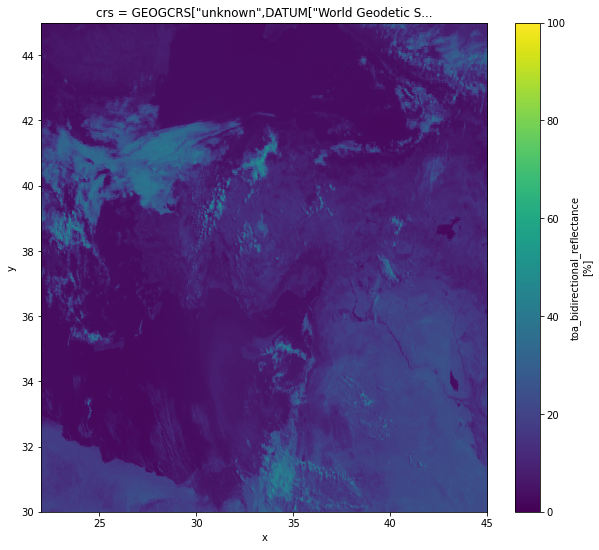

In [73]:
plt.figure()
new_scn['VIS006'].plot.imshow(vmin=0, vmax=100)

### Display over Map

In [95]:
from ipyleaflet import Map, basemaps, LayersControl, WidgetControl
import rioxarray
from ipyleaflet import Map, basemaps, projections



In [90]:
import xarray_leaflet 
da = rioxarray.open_rasterio('HRV_20230814_060000.tif', masked=True)

da = da.sel(band=1)
da.name = 'HRV'

In [76]:
import rioxarray 

In [97]:

l = da.leaflet.plot(m, colormap=plt.cm.terrain)

Url()

In [96]:
m = Map(center=[40, 40], zoom=5, basemap=basemaps.CartoDB.Voyager,crs=projections.EPSG4326, interpolation='nearest')
m


Map(center=[40, 40], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

### Export to netcdf

In [ ]:
## save the data to netcdf for visible 
scn.save_datasets(writer='cf', datasets= [row for row in seviri_data_names if row is not 'HRV'], filename=nc_filename_vis)

print('done')

In [ ]:
## save the data to netcdf for hrv 
scn.save_datasets(writer='cf', datasets=['HRV'], filename=nc_filename_hrv)
print('done')

In [ ]:
## define a function to get metadata of netcdf
import netCDF4 as nc

def display_netcdf_info(file_path):
    # Open the NetCDF file
    with nc.Dataset(file_path) as ds:
        # Display general attributes
        print("Global Attributes:")
        for name in ds.ncattrs():
            print(f"{name}: {ds.getncattr(name)}")
        print("\n")

        # Display dimensions
        print("Dimensions:")
        for name, dim in ds.dimensions.items():
            print(f"{name}: {len(dim)}")
        print("\n")

        # Display variables and their attributes
        print("Variables:")
        for name, var in ds.variables.items():
            print(f"{name}:")
            for attr_name in var.ncattrs():
                print(f"    {attr_name}: {var.getncattr(attr_name)}")
        print("\n")
import xarray as xr

def display_netcdf_info_xarray(file_path):
    # Open the NetCDF file with xarray
    ds = xr.open_dataset(file_path)
    
    # Display dataset
    print(ds)
    
    # Close the dataset
    ds.close()


In [ ]:
## Display netcdf 

In [ ]:
display_netcdf_info_xarray(nc_filename_hrv)

In [ ]:
## Display visible data metadata
display_netcdf_info(nc_filename_vis)